<a href="https://colab.research.google.com/github/thant-san/faceshapeclassification/blob/main/Mlwithfaceshape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


In [5]:
train=pd.read_csv('/content/faceshape5 (1).csv')
test=pd.read_csv('/content/faceshape5test.csv')

In [6]:
train.describe()

,faceshape,line1,line2,line3,line4,line5
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,1.608618,107.129851,123.776656,112.405603,144.212483,71.754602
std,1.023250,90.838241,104.771810,94.801639,122.965022,61.258614
min,0.000000,28.017851,33.000000,29.000000,38.470768,18.357560
25%,1.000000,66.039759,76.105190,70.000000,88.039759,43.416587
50%,2.000000,80.156098,93.005376,84.121931,108.378933,53.567704
75%,2.000000,103.827793,119.173168,108.592054,138.165660,69.803293
max,3.000000,1029.095234,1150.035217,1017.001967,1294.085778,669.354913


In [7]:
train.value_counts()

faceshape  line1        line2        line3        line4        line5     
2.0        119.016806   136.033084   122.036880   151.082759   79.025312     6
           68.029405    79.056942    73.061618    91.049437    44.102154     6
           60.074953    70.114193    63.198101    79.101201    42.059482     4
           65.030762    75.026662    66.030296    82.054860    39.408121     4
           89.274856    102.396289   93.434469    120.337027   59.908263     4
                                                                            ..
1.0        95.005263    112.017856   101.019800   132.015151   60.216277     1
           95.021050    111.040533   102.078401   135.014814   60.827625     1
           96.005208    112.004464   102.044108   141.031911   60.876925     1
           96.026038    112.294256   103.097042   132.517923   65.764732     1
3.0        1029.095234  1150.035217  1017.001967  1294.085778  669.354913    1
Length: 868, dtype: int64

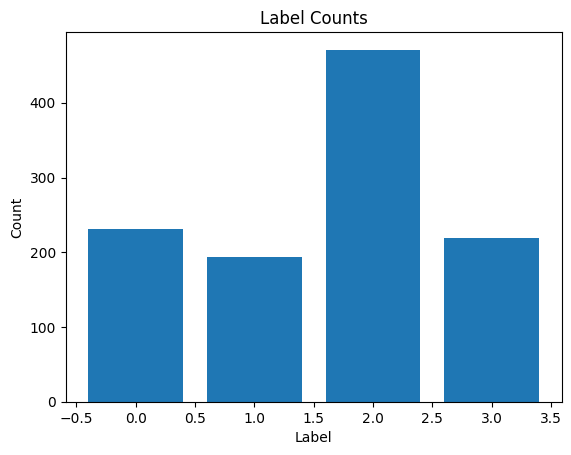

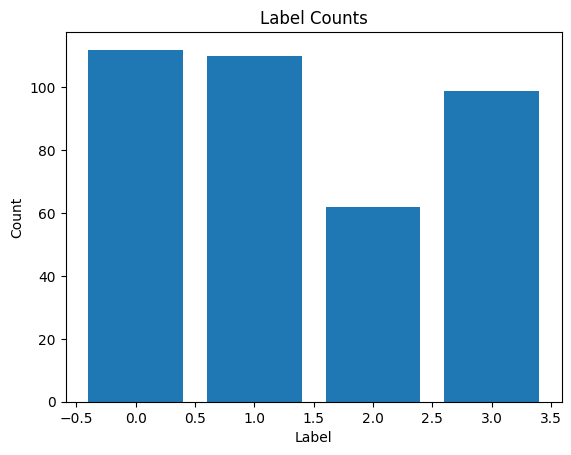

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file


# Count the occurrences of each label
label_counts = train['faceshape'].value_counts()

# Create a bar plot of label counts
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')
plt.show()
label_counts = test['faceshape'].value_counts()

# Create a bar plot of label counts
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts')
plt.show()



In [10]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [11]:
label_counts = train['faceshape'].value_counts()
print("Current Label Distribution:")
print(label_counts)

Current Label Distribution:
2.0    471
0.0    231
3.0    219
1.0    193
Name: faceshape, dtype: int64


In [14]:
# Split the dataframe into features (X) and labels (y)
X_train = train.drop('faceshape', axis=1)  # Features (input variables)
y_train = train['faceshape']  # Labels (output variable)


In [15]:
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
undersampled_label_counts = pd.Series(y_resampled).value_counts()
print("\nUndersampled Label Distribution:")
print(undersampled_label_counts)


Undersampled Label Distribution:
0.0    193
1.0    193
2.0    193
3.0    193
Name: faceshape, dtype: int64


In [30]:
label_counts = test['faceshape'].value_counts()
print("Current Label Distribution:")
print(label_counts)

Current Label Distribution:
0.0    112
1.0    110
3.0     99
2.0     62
Name: faceshape, dtype: int64


In [35]:
X_test = test.drop('faceshape', axis=1)  # Features (input variables)
y_test = test['faceshape']  # Labels (output variable)


In [17]:
X_test = test.drop('faceshape', axis=1)  # Features (input variables)
y_test = train['faceshape']  # Labels (output variable)

In [40]:
rus = RandomUnderSampler(random_state=42)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)
undersampled_label_counts = pd.Series(y_undersampled).value_counts()

print("\nUndersampled Label Distribution:")
print(undersampled_label_counts)


Undersampled Label Distribution:
0.0    62
1.0    62
2.0    62
3.0    62
Name: faceshape, dtype: int64


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = X_train_resampled,X_test_resampled,y_train_resampled,y_test_resampled
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1884, 5) (1884,) (248, 5) (248,)


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)


RandomForestClassifier()

In [45]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5040322580645161


In [46]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model with the optimized hyperparameters
best_clf = grid_search.best_estimator_


In [81]:
# Make predictions on new data
new_data = pd.DataFrame([[106.30145812734649,
                          122.40914998479485,
                          109.45775440780794,
                          130.31116606031887,
                          70.68238818828917]])
#predictions = best_clf.predict(new_data)
feature_names = ['line1', 'line2', 'line3', 'line4','line5']
#new_data_df = pd.DataFrame(new_data, columns=feature_names)
predictions = best_clf.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [71]:
import pandas as pd

# Assuming line1, line2, line3, line4 are the feature names
feature_names = ['line1', 'line2', 'line3', 'line4']

# Create a DataFrame for X with feature names
#real_data = pd.DataFrame([[309.01294471267704, 356.3509506090871, 292.2498930709813, 399.12905181156634]], columns=feature_names)

# Make predictions
predictions = clf.predict(X)
print(predictions)

[0. 0. 0. ... 3. 3. 3.]


In [72]:
from sklearn import metrics
from sklearn.metrics import classification_report 

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for classifier RandomForestClassifier():
              precision    recall  f1-score   support

         0.0       0.53      0.66      0.59        62
         1.0       0.58      0.47      0.52        62
         2.0       0.43      0.53      0.48        62
         3.0       0.40      0.29      0.34        62

    accuracy                           0.49       248
   macro avg       0.49      0.49      0.48       248
weighted avg       0.49      0.49      0.48       248




In [73]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_predictions = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forests Accuracy:", rf_accuracy)

Random Forests Accuracy: 0.5040322580645161


In [74]:
predictions=rf_clf.predict(new_data)
print(predictions)

[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [79]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
predictions=svm_clf.predict(new_data)
print(predictions)

SVM Accuracy: 0.5040322580645161
[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [82]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_predictions = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)
predictions=lr_clf.predict(new_data)
print(predictions)

Logistic Regression Accuracy: 0.4798387096774194
[2.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
from sklearn.neighbors import KNeighborsClassifier
error = []
best_k = dict()

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    best_k[i] = np.mean(pred_i != y_test)
    
best_k = sorted(best_k.items(), key=lambda k: k[1])[0][0]
print(best_k)
knn_classifier = KNeighborsClassifier(n_neighbors=best_k, n_jobs=-1)
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

8
